In [97]:
import pandas as pd
import numpy as np
import math
from IPython.display import HTML

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [98]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

ds = pd.read_csv("F:/3course2sem/ITC/coursework/5e_monster_data_5eTools.csv")
ds.head(100)

,Unnamed: 0,name,hp,hp formula,hp special,ac,ac special,cr,str,dex,con,int,wis,cha,str save,dex save,con save,int save,wis save,cha save,walk,fly,swim,burrow,climb,hover,size,alignment,type,source
0,0,Ancient Deep Crow,187,15d12 + 90,-,18,-,15,23,16,23,10,15,19,-,-,+11,-,+7,-,20,80,-,-,-,-,H,U,monstrosity,AI
1,1,Auspicia Dran,52,8d8 + 16,-,15,-,2,16,14,14,15,12,10,-,-,-,-,-,-,30,-,-,-,-,-,M,NG,humanoid,AI
2,2,Brahma Lutier,33,6d8 + 6,-,12,-,2,12,15,12,11,13,16,-,-,-,-,-,-,30,-,-,-,-,-,M,N,humanoid,AI
3,3,Chaos Quadrapod,52,7d10 + 14,-,14,-,4,18,13,15,6,10,4,-,-,-,-,-,-,40,-,-,-,40,-,L,CE,aberration,AI
4,4,Clockwork Dragon,22,4d8 + 4,-,16,-,1,14,10,12,10,11,13,-,-,-,-,-,-,30,60,-,-,-,-,M,N,construct,AI
5,5,Deep Crow,133,14d10 + 56,-,17,-,9,20,16,18,8,15,14,-,-,+8,-,+6,-,20,80,-,-,-,-,L,U,monstrosity,AI
6,6,Donaar Blit'zen,45,7d8 + 14,-,18,-,3,17,8,14,10,10,16,-,-,-,-,+2,+5,30,-,-,-,-,-,M,CG,humanoid,AI
7,7,Flabbergast,40,9d8,-,12,-,4,10,14,10,17,13,13,-,-,-,+5,+3,-,30,-,-,-,-,-,M,LN,humanoid,AI
8,8,Jim Darkmagic,40,9d8,-,12,-,5,8,14,10,18,12,14,-,-,-,+7,+4,-,30,-,-,-,-,-,M,CN,humanoid,AI
9,9,K'thriss Drow'b,44,8d8 + 8,-,14,-,3,8,14,12,14,11,18,+0,+3,+2,+3,+3,+7,30,-,-,-,-,-,M,CN,humanoid,AI


In [99]:
ds.shape

(2947, 30)

In [100]:
columns_list = ds.columns.tolist()
print(columns_list)

['Unnamed: 0', 'name', 'hp', 'hp formula', 'hp special', 'ac', 'ac special', 'cr', 'str', 'dex', 'con', 'int', 'wis', 'cha', 'str save', 'dex save', 'con save', 'int save', 'wis save', 'cha save', 'walk', 'fly', 'swim', 'burrow', 'climb', 'hover', 'size', 'alignment', 'type', 'source']


In [101]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2947 non-null   int64 
 1   name        2947 non-null   object
 2   hp          2947 non-null   object
 3   hp formula  2947 non-null   object
 4   hp special  2947 non-null   object
 5   ac          2947 non-null   object
 6   ac special  2947 non-null   object
 7   cr          2947 non-null   object
 8   str         2947 non-null   object
 9   dex         2947 non-null   object
 10  con         2947 non-null   object
 11  int         2947 non-null   object
 12  wis         2947 non-null   object
 13  cha         2947 non-null   object
 14  str save    2947 non-null   object
 15  dex save    2947 non-null   object
 16  con save    2947 non-null   object
 17  int save    2947 non-null   object
 18  wis save    2947 non-null   object
 19  cha save    2947 non-null   object
 20  walk    

In [102]:
ds.describe(include='O')

,name,hp,hp formula,hp special,ac,ac special,cr,str,dex,con,int,wis,cha,str save,dex save,con save,int save,wis save,cha save,walk,fly,swim,burrow,climb,hover,size,alignment,type,source
count,2947,2947,2947,2947,2947,2947,2947,2947,2947,2947,2947,2947,2947,2947,2947,2947,2947,2947,2947,2947,2947,2947,2947,2947,2947,2947,2947,2947,2947
unique,2664,235,501,46,22,9,35,31,26,26,30,29,30,21,19,22,20,21,20,16,14,11,9,10,2,7,26,15,79
top,Expert,22,5d8 + 5,-,12,-,2,10,14,14,10,10,10,-,-,-,-,-,-,30,-,-,-,-,-,M,U,humanoid,MM
freq,4,106,58,2893,419,2921,339,347,578,390,418,552,280,2748,2432,2312,2553,1997,2407,1644,2375,2606,2840,2667,2793,1604,570,1015,450


In [103]:
ds = ds[ds['cr'] != '-']


In [104]:
def clean_and_convert(value):
    cleaned_value = value.replace('+', '').replace('-', '')
    if cleaned_value:
        return int(cleaned_value)
    else:
        return None


In [105]:
for col in ds.columns[14:20]:  
    ds[col] = ds[col].apply(clean_and_convert)


In [106]:
ds.head()

,Unnamed: 0,name,hp,hp formula,hp special,ac,ac special,cr,str,dex,con,int,wis,cha,str save,dex save,con save,int save,wis save,cha save,walk,fly,swim,burrow,climb,hover,size,alignment,type,source
0,0,Ancient Deep Crow,187,15d12 + 90,-,18,-,15,23,16,23,10,15,19,NaN,NaN,11.0,NaN,7.0,NaN,20,80,-,-,-,-,H,U,monstrosity,AI
1,1,Auspicia Dran,52,8d8 + 16,-,15,-,2,16,14,14,15,12,10,NaN,NaN,NaN,NaN,NaN,NaN,30,-,-,-,-,-,M,NG,humanoid,AI
2,2,Brahma Lutier,33,6d8 + 6,-,12,-,2,12,15,12,11,13,16,NaN,NaN,NaN,NaN,NaN,NaN,30,-,-,-,-,-,M,N,humanoid,AI
3,3,Chaos Quadrapod,52,7d10 + 14,-,14,-,4,18,13,15,6,10,4,NaN,NaN,NaN,NaN,NaN,NaN,40,-,-,-,40,-,L,CE,aberration,AI
4,4,Clockwork Dragon,22,4d8 + 4,-,16,-,1,14,10,12,10,11,13,NaN,NaN,NaN,NaN,NaN,NaN,30,60,-,-,-,-,M,N,construct,AI


In [107]:
def round_down(x):
    return math.floor(x)
def fill_missing(df, stat):
    df[stat] = df[stat].astype(int)
    x=(df[stat] - 10) / 2
    x=x.apply(round_down)
    df[stat+" save"].fillna(x, inplace=True)
stat_list=['str',	'dex',	'con',	'int',	'wis',	'cha']
for stat in stat_list:
    fill_missing(ds, stat)
ds.head(10)


,Unnamed: 0,name,hp,hp formula,hp special,ac,ac special,cr,str,dex,con,int,wis,cha,str save,dex save,con save,int save,wis save,cha save,walk,fly,swim,burrow,climb,hover,size,alignment,type,source
0,0,Ancient Deep Crow,187,15d12 + 90,-,18,-,15,23,16,23,10,15,19,6.0,3.0,11.0,0.0,7.0,4.0,20,80,-,-,-,-,H,U,monstrosity,AI
1,1,Auspicia Dran,52,8d8 + 16,-,15,-,2,16,14,14,15,12,10,3.0,2.0,2.0,2.0,1.0,0.0,30,-,-,-,-,-,M,NG,humanoid,AI
2,2,Brahma Lutier,33,6d8 + 6,-,12,-,2,12,15,12,11,13,16,1.0,2.0,1.0,0.0,1.0,3.0,30,-,-,-,-,-,M,N,humanoid,AI
3,3,Chaos Quadrapod,52,7d10 + 14,-,14,-,4,18,13,15,6,10,4,4.0,1.0,2.0,-2.0,0.0,-3.0,40,-,-,-,40,-,L,CE,aberration,AI
4,4,Clockwork Dragon,22,4d8 + 4,-,16,-,1,14,10,12,10,11,13,2.0,0.0,1.0,0.0,0.0,1.0,30,60,-,-,-,-,M,N,construct,AI
5,5,Deep Crow,133,14d10 + 56,-,17,-,9,20,16,18,8,15,14,5.0,3.0,8.0,-1.0,6.0,2.0,20,80,-,-,-,-,L,U,monstrosity,AI
6,6,Donaar Blit'zen,45,7d8 + 14,-,18,-,3,17,8,14,10,10,16,3.0,-1.0,2.0,0.0,2.0,5.0,30,-,-,-,-,-,M,CG,humanoid,AI
7,7,Flabbergast,40,9d8,-,12,-,4,10,14,10,17,13,13,0.0,2.0,0.0,5.0,3.0,1.0,30,-,-,-,-,-,M,LN,humanoid,AI
8,8,Jim Darkmagic,40,9d8,-,12,-,5,8,14,10,18,12,14,-1.0,2.0,0.0,7.0,4.0,2.0,30,-,-,-,-,-,M,CN,humanoid,AI
9,9,K'thriss Drow'b,44,8d8 + 8,-,14,-,3,8,14,12,14,11,18,0.0,3.0,2.0,3.0,3.0,7.0,30,-,-,-,-,-,M,CN,humanoid,AI


In [108]:
# Знаходження унікальних значень в колонці "columnName"
unique_values = ds['hp special'].unique()

# Виведення унікальних значень
print(unique_values)

['-' '—(immune to damage)'
 '127 (17d8+51) reduced to 107; subtract 1 for each day that passes during the adventure'
 '1']


In [109]:
desired_value = '—(immune to damage)'

filtered_ds = ds[ds['hp special'] == desired_value]
filtered_ds



,Unnamed: 0,name,hp,hp formula,hp special,ac,ac special,cr,str,dex,con,int,wis,cha,str save,dex save,con save,int save,wis save,cha save,walk,fly,swim,burrow,climb,hover,size,alignment,type,source
2063,2063,Meeseeks,4,1d8,—(immune to damage),10,-,0,10,10,10,10,10,10,0.0,0.0,0.0,0.0,0.0,0.0,30,-,-,-,-,-,M,A,humanoid,RMBRE


In [110]:
desired_value = '—(immune to damage)'

filtered_ds = ds[ds['hp special'] == desired_value]

index_to_drop = filtered_ds.index

ds.drop(index_to_drop, inplace=True)


In [111]:
desired_value = '127 (17d8+51) reduced to 107; subtract 1 for each day that passes during the adventure'
filtered_ds = ds[ds['hp special'] == desired_value]

# Виведіть результат
filtered_ds

,Unnamed: 0,name,hp,hp formula,hp special,ac,ac special,cr,str,dex,con,int,wis,cha,str save,dex save,con save,int save,wis save,cha save,walk,fly,swim,burrow,climb,hover,size,alignment,type,source
2473,2473,Ras Nsi,-,-,127 (17d8+51) reduced to 107; subtract 1 for e...,15,-,7,17,16,17,18,18,21,3.0,3.0,6.0,4.0,7.0,5.0,30,-,-,-,-,-,M,NE,monstrosity,ToA


In [112]:
filtered_indices = ds.index[ds['hp special'] == desired_value].tolist()

column_to_change = 'hp'
new_value = 127

ds.loc[filtered_indices, column_to_change] = new_value

In [113]:

desired_value = '1'
filtered_ds = ds[ds['hp special'] == desired_value]

# Виведіть результат
filtered_ds

,Unnamed: 0,name,hp,hp formula,hp special,ac,ac special,cr,str,dex,con,int,wis,cha,str save,dex save,con save,int save,wis save,cha save,walk,fly,swim,burrow,climb,hover,size,alignment,type,source
2771,2771,Elzerina Cassalanter,-,-,1,10,-,Unknown,10,10,10,10,10,10,0.0,0.0,0.0,0.0,0.0,0.0,30,-,-,-,-,-,S,N,humanoid,WDH
2790,2790,Jenks,-,-,1,10,-,Unknown,10,10,10,10,10,10,0.0,0.0,0.0,0.0,0.0,0.0,30,-,-,-,-,-,S,N,humanoid,WDH
2804,2804,Mechanical Bird,-,-,1,15,-,Unknown,10,10,10,10,10,10,0.0,0.0,0.0,0.0,0.0,0.0,-,60,-,-,-,-,T,N,construct,WDH
2809,2809,Nat,-,-,1,10,-,Unknown,10,10,10,10,10,10,0.0,0.0,0.0,0.0,0.0,0.0,30,-,-,-,-,-,S,N,humanoid,WDH
2828,2828,Squiddly,-,-,1,10,-,Unknown,10,10,10,10,10,10,0.0,0.0,0.0,0.0,0.0,0.0,30,-,-,-,-,-,S,N,humanoid,WDH
2834,2834,Terenzio Cassalanter,-,-,1,10,-,Unknown,10,10,10,10,10,10,0.0,0.0,0.0,0.0,0.0,0.0,30,-,-,-,-,-,S,N,humanoid,WDH


In [114]:
filtered_indices = ds.index[ds['hp special'] == desired_value].tolist()

column_to_change = 'hp'
new_value = 1

ds.loc[filtered_indices, column_to_change] = new_value

In [115]:
def convert_to_decimal(value):
    try:
        numerator, denominator = map(int, value.split('/'))
        return numerator / denominator
    except:
        if(value == "Unknown"):
            return 0
        else:
            return value

In [116]:
ds['cr'] = ds['cr'].apply(convert_to_decimal)


In [117]:
# Знаходження унікальних значень в колонці "columnName"
unique_values = ds['ac special'].unique()

# Виведення унікальних значень
print(unique_values)

['-']


In [118]:
ds['cr'] = pd.to_numeric(ds['cr'], errors='coerce')
# Знаходження унікальних значень в колонці "columnName"
unique_values = ds['cr'].unique()

# Виведення унікальних значень
print(unique_values)

[15.     2.     4.     1.     9.     3.     5.    11.     6.    12.
  8.    10.    13.     0.25  26.    16.    25.    21.    14.     0.5
  0.     7.     0.125 17.    18.    22.    23.    24.    19.    28.
 30.    27.    20.   ]


In [119]:
columns_to_replace = ['walk',	'fly',	'swim',	'burrow',	'climb'	]  # Список назв стовпців, які потрібно замінити

# Заміна символів '-' на 0 у вказаних стовпцях
ds[columns_to_replace] = ds[columns_to_replace].replace('-', 0)
for col in columns_to_replace:
    ds[col] = pd.to_numeric(ds[col], errors='coerce')



In [120]:
ds['hp'] = pd.to_numeric(ds['hp'], errors='coerce')
ds['ac'] = pd.to_numeric(ds['ac'], errors='coerce')


In [121]:
columns_to_drop = ['Unnamed: 0', 'hp formula', 'hp special', 'ac special', ]
for col in columns_to_drop:
        ds = ds.drop(col, axis=1)


In [122]:
ds['hover'] = ds['hover'].replace('-', 'False')


In [123]:
print(ds['alignment'].value_counts())
value_counts = ds['alignment'].value_counts()
other_values = value_counts[value_counts <= 10].index
ds['alignment'] = ds['alignment'].replace(other_values, 'other')

alignment
U                 545
CE                454
NE                395
LE                381
A                 263
N                 205
LG                111
CN                106
LN                 93
CG                 83
NG                 63
-                  51
LNXCNYE            21
NG, NE              7
LNXCE               6
NXCGNYE             6
CGNYE               5
lawful grumpy       3
N, NXNYN            2
CG, NE              2
neutral oozy        1
chaotic sticky      1
chaotic silly       1
L                   1
Name: count, dtype: int64


In [124]:
print(ds['alignment'].value_counts())


alignment
U          545
CE         454
NE         395
LE         381
A          263
N          205
LG         111
CN         106
LN          93
CG          83
NG          63
-           51
other       35
LNXCNYE     21
Name: count, dtype: int64


In [125]:
print(ds['source'].value_counts())
value_counts = ds['source'].value_counts()
other_values = value_counts[value_counts <= 10].index
ds['source'] = ds['source'].replace(other_values, 'other')

source
MM           442
MPMM         252
VGM          140
MTF          138
TftYP        131
WDH           94
OotA          93
CoS           92
WDMM          89
ToA           88
SKT           88
IDRotF        81
GGR           79
FTD           69
CRCotN        67
PotA          58
GoS           57
MaBJoV        56
BGDIA         52
WBtW          52
MOT           51
EGW           47
SCC           47
PSZ           43
ERLW          40
CM            39
VRGR          35
IMR           25
RoT           24
HotDQ         23
PSA           23
AI            22
MFF           18
OoW           17
PSI           14
PSX           12
LLK           11
MCV1SC        10
LMoP           9
RMBRE          8
LR             6
MGELFT         6
DIP            5
TTP            5
PSD            4
AitFR-DN       4
SLW            3
TCE            3
AitFR-THP      3
NRH-CoI        3
PSK            3
KKW            3
RtG            2
NRH-AT         2
SDW            2
NRH-AVitW      2
NRH-TCMC       2
AitFR-FCD      2
AitFR-I

In [126]:
print(ds['source'].value_counts())


source
MM        442
MPMM      252
VGM       140
MTF       138
TftYP     131
other      97
WDH        94
OotA       93
CoS        92
WDMM       89
ToA        88
SKT        88
IDRotF     81
GGR        79
FTD        69
CRCotN     67
PotA       58
GoS        57
MaBJoV     56
WBtW       52
BGDIA      52
MOT        51
SCC        47
EGW        47
PSZ        43
ERLW       40
CM         39
VRGR       35
IMR        25
RoT        24
PSA        23
HotDQ      23
AI         22
MFF        18
OoW        17
PSI        14
PSX        12
LLK        11
Name: count, dtype: int64


# <span style="color:purple">EDA </span>

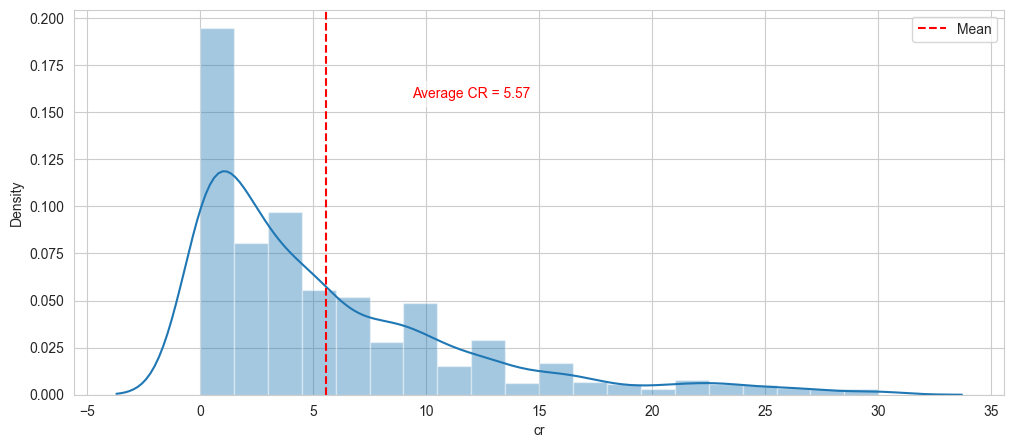

In [127]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,5))

plotd = sns.distplot(ds.cr, kde=True, bins=20)

mean_line = plt.axvline(ds.cr.mean(), c='red', linestyle='dashed', label='Mean')

plt.text(0.49, 0.8, f'Average CR = {ds.cr.mean():.2f}', transform=plt.gca().transAxes, color='red', fontsize=10,
         verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white',alpha=0.5))
plt.legend()
plt.show()

In [128]:
ds.head(10)

,name,hp,ac,cr,str,dex,con,int,wis,cha,str save,dex save,con save,int save,wis save,cha save,walk,fly,swim,burrow,climb,hover,size,alignment,type,source
0,Ancient Deep Crow,187,18,15.0,23,16,23,10,15,19,6.0,3.0,11.0,0.0,7.0,4.0,20,80,0,0,0,False,H,U,monstrosity,AI
1,Auspicia Dran,52,15,2.0,16,14,14,15,12,10,3.0,2.0,2.0,2.0,1.0,0.0,30,0,0,0,0,False,M,NG,humanoid,AI
2,Brahma Lutier,33,12,2.0,12,15,12,11,13,16,1.0,2.0,1.0,0.0,1.0,3.0,30,0,0,0,0,False,M,N,humanoid,AI
3,Chaos Quadrapod,52,14,4.0,18,13,15,6,10,4,4.0,1.0,2.0,-2.0,0.0,-3.0,40,0,0,0,40,False,L,CE,aberration,AI
4,Clockwork Dragon,22,16,1.0,14,10,12,10,11,13,2.0,0.0,1.0,0.0,0.0,1.0,30,60,0,0,0,False,M,N,construct,AI
5,Deep Crow,133,17,9.0,20,16,18,8,15,14,5.0,3.0,8.0,-1.0,6.0,2.0,20,80,0,0,0,False,L,U,monstrosity,AI
6,Donaar Blit'zen,45,18,3.0,17,8,14,10,10,16,3.0,-1.0,2.0,0.0,2.0,5.0,30,0,0,0,0,False,M,CG,humanoid,AI
7,Flabbergast,40,12,4.0,10,14,10,17,13,13,0.0,2.0,0.0,5.0,3.0,1.0,30,0,0,0,0,False,M,LN,humanoid,AI
8,Jim Darkmagic,40,12,5.0,8,14,10,18,12,14,-1.0,2.0,0.0,7.0,4.0,2.0,30,0,0,0,0,False,M,CN,humanoid,AI
9,K'thriss Drow'b,44,14,3.0,8,14,12,14,11,18,0.0,3.0,2.0,3.0,3.0,7.0,30,0,0,0,0,False,M,CN,humanoid,AI


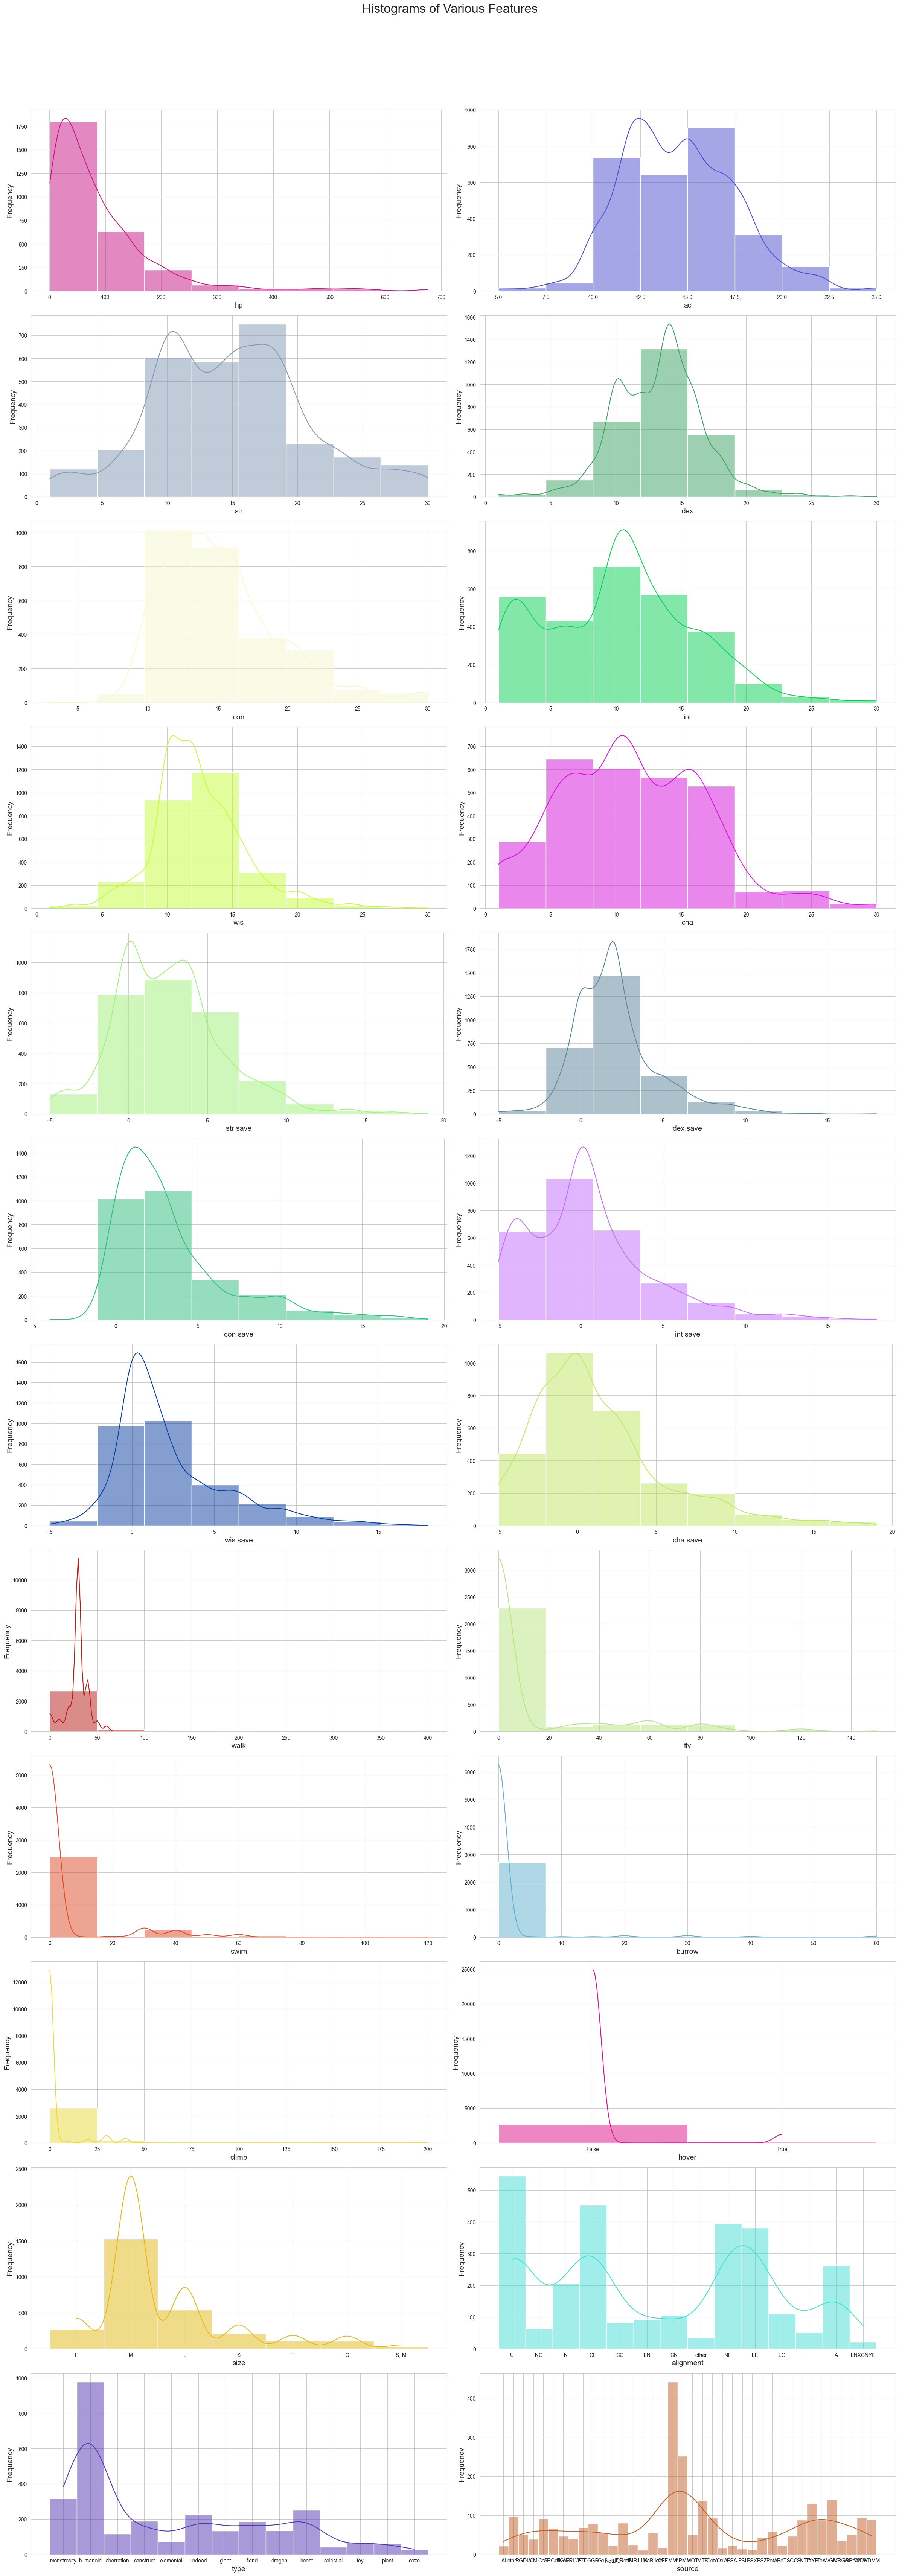

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns
from random import randint

selected_cols = [col for col in ds.columns if col not in [ 'cr', 'name']]

colors = ['mediumvioletred']
for i in range(len(selected_cols)):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

num_subplots = len(selected_cols)
num_rows = (num_subplots - 1) // 2 + 1
num_cols = min(2, num_subplots)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(24, num_rows * 6), facecolor='white')  # змінено розмір
fig.suptitle("Histograms of Various Features", size=24)

for i in range(num_rows):
    for j in range(num_cols):
        idx = i * num_cols + j
        if idx < num_subplots:
            sns.histplot(ds[selected_cols[idx]], ax=axes[i, j], color=colors[idx], kde=True, bins=8)
            axes[i, j].set_xlabel(selected_cols[idx], fontsize=14)  # Збільшено розмір шрифту міток по осі X
            axes[i, j].set_ylabel("Frequency", fontsize=14)  # Збільшено розмір шрифту міток по осі Y

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


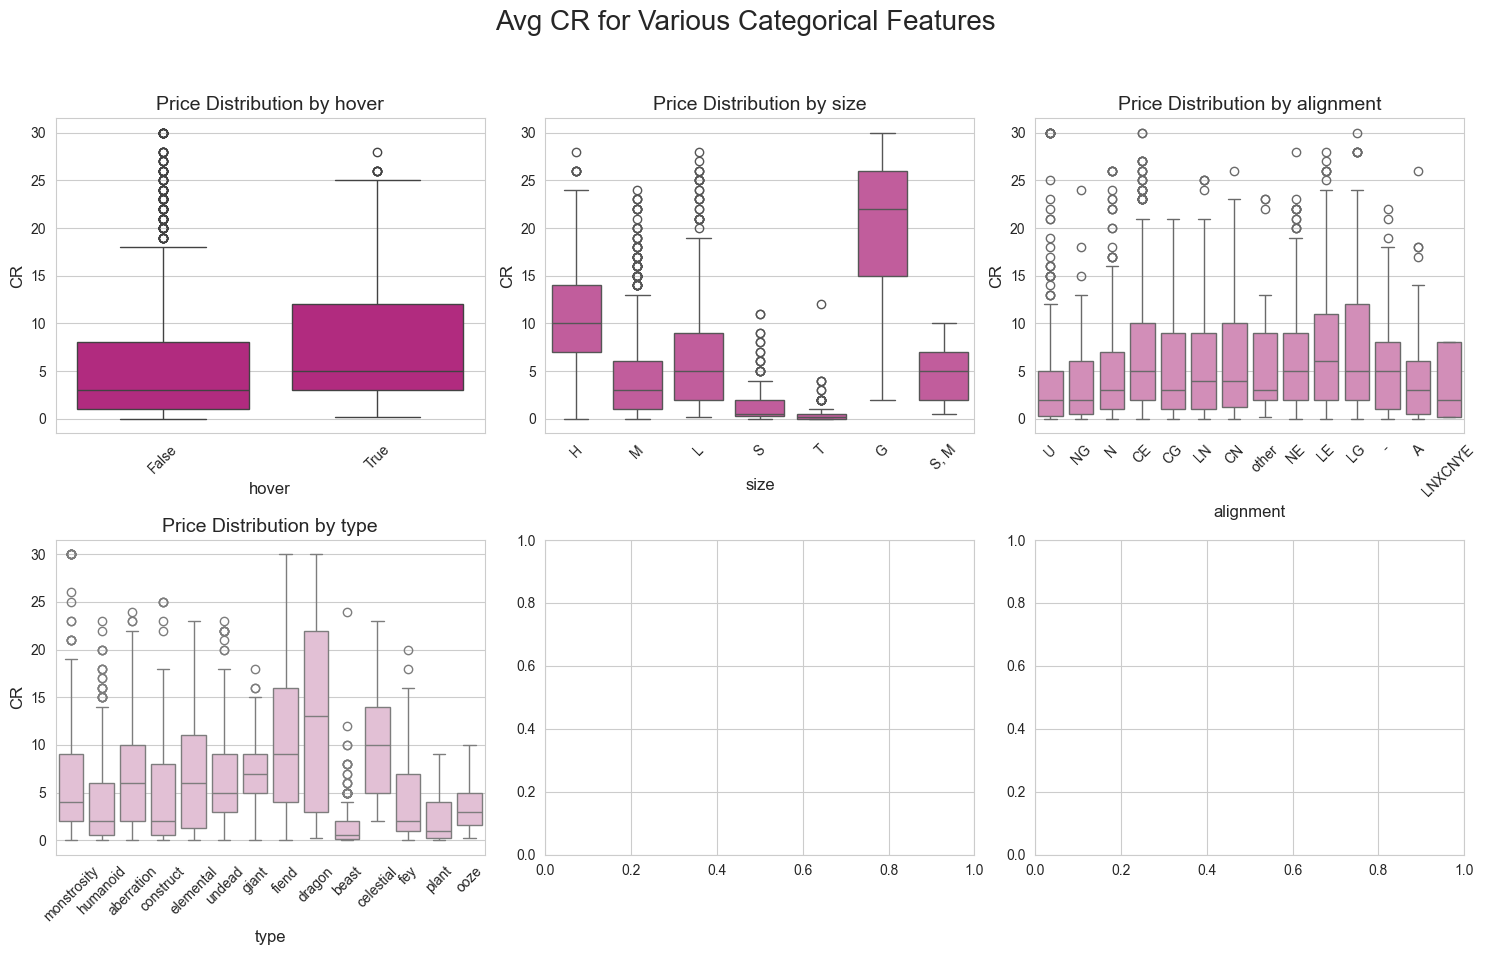

In [130]:

categorical_cols = ds.select_dtypes(include=['object']).columns

selected_cols = [col for col in categorical_cols if col  in ['hover',	'size',	'alignment',	'type']]

num_subplots = len(selected_cols)
num_rows = (num_subplots - 1) //3 + 1
num_cols = min(3, num_subplots)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5), facecolor='white')
fig.suptitle("Avg CR for Various Categorical Features", size=20)

colors = sns.light_palette('mediumvioletred', n_colors=len(selected_cols)+1, reverse=True)

for i in range(num_rows):
    for j in range(num_cols):
        idx = i * num_cols + j
        if idx < num_subplots:
           

            sns.boxplot(x=selected_cols[idx], y='cr', data=ds, ax=axes[i, j], palette=[colors[idx]])
            axes[i, j].set_title(f'Price Distribution by {selected_cols[idx]}', fontsize=14)
            axes[i, j].set_xlabel(selected_cols[idx], fontsize=12)
            axes[i, j].set_ylabel("CR", fontsize=12)
            axes[i, j].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

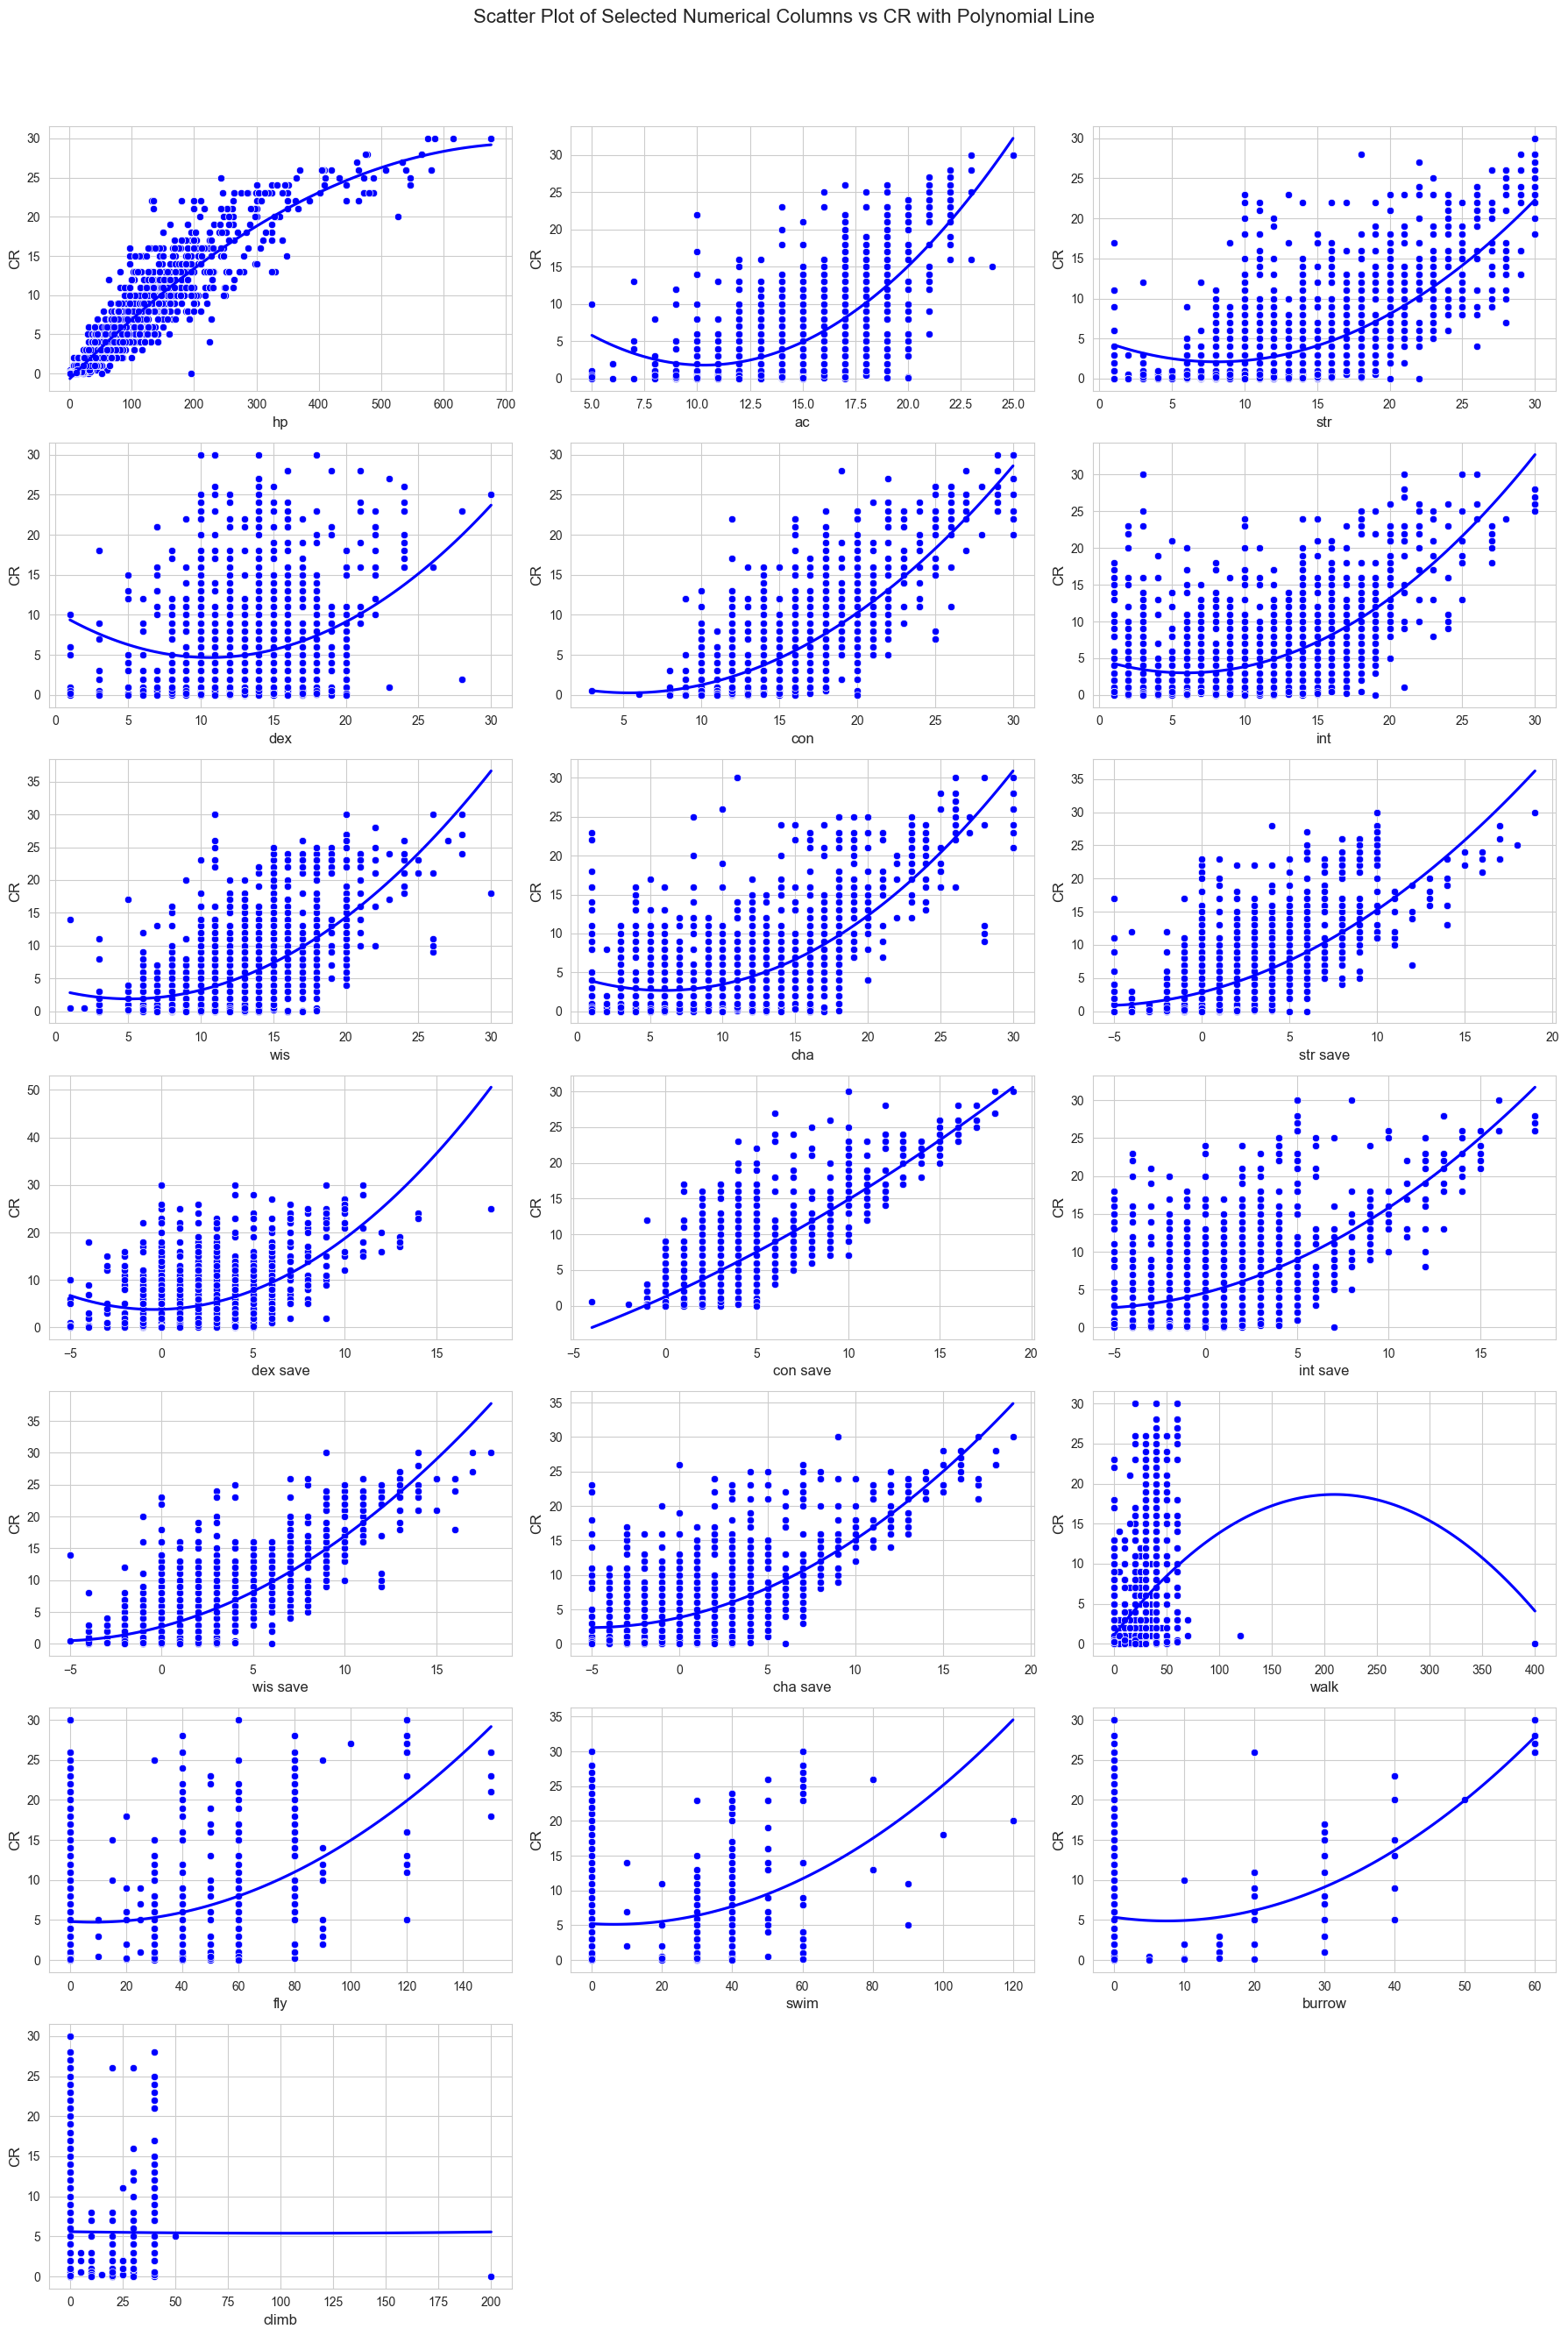

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

# Вибір числових колонок
numerical_cols = ds.select_dtypes(include=['float64', 'int64']).columns

# Вибір потрібних колонок
selected_cols = ['hp',	'ac','str',	'dex',	'con',
                 'int',	'wis',	'cha',	'str save',	'dex save',
                 'con save',	'int save',	'wis save',	'cha save',
                 'walk',	'fly',	'swim',	'burrow',	'climb']  # Вкажіть назви колонок, які ви хочете відобразити

# Визначення кількості рядків для графіків
num_rows = len(selected_cols) // 3 + (1 if len(selected_cols) % 3 != 0 else 0)

# Визначення кількості стовпців
num_cols = 3

# Розмір графіків
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 4*num_rows), facecolor='white')

# Заголовок для кожного рядка графіків
fig.suptitle("Scatter Plot of Selected Numerical Columns vs CR with Polynomial Line", size=16)

# Цикл для створення графіків
for i, col in enumerate(selected_cols):
    row = i // num_cols
    col_idx = i % num_cols
    ax = axes[row, col_idx]
    
    # Створення scatter plot та поліноміальної лінії для кожної вибраної колонки
    sns.scatterplot(x=col, y='cr', data=ds, ax=ax, color='blue')
    sns.regplot(x=col, y='cr', data=ds, ax=ax, scatter=False, order=2, color='blue', ci=None)
    
    # Налаштування міток осей
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("CR", fontsize=12)

# Видалення непотрібних пустих графіків
if len(selected_cols) < num_rows * num_cols:
    for i in range(len(selected_cols), num_rows * num_cols):
        row = i // num_cols
        col_idx = i % num_cols
        fig.delaxes(axes[row, col_idx])

# Відображення графіків
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# <span style="color:purple">Feature Engineering </span>

In [132]:
columns_list = ds.columns.tolist()
print(columns_list)

['name', 'hp', 'ac', 'cr', 'str', 'dex', 'con', 'int', 'wis', 'cha', 'str save', 'dex save', 'con save', 'int save', 'wis save', 'cha save', 'walk', 'fly', 'swim', 'burrow', 'climb', 'hover', 'size', 'alignment', 'type', 'source']


In [133]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.model_selection import train_test_split


# Split the DataFrame into features (X) and target (y)
X = ds[['hp', 'ac', 
        'str', 'dex', 'con', 'int', 'wis', 'cha', 
        'str save', 'dex save', 'con save', 'int save', 'wis save', 'cha save', 
        'walk', 'fly', 'swim', 'burrow', 'climb', 'hover', 
        'size', 'alignment', 'type', 'source']]

y = ds['cr']

categorical_columns = [ 'hover', 'size', 'alignment', 'type', 'source']

# Define the feature engineering pipeline
feature_engineering_pipeline = Pipeline([
    ('encoder', SklearnTransformerWrapper(OrdinalEncoder(), variables=categorical_columns)),  # Ordinal encode categorical variable
    ('scaler', SklearnTransformerWrapper(MinMaxScaler())),  # Standardize variables
])

In [134]:
# Split the transformed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

X_train = feature_engineering_pipeline.fit_transform(X_train)

X_test = feature_engineering_pipeline.transform(X_test)
X_train.head(5)

,hp,ac,str,dex,con,int,wis,cha,str save,dex save,con save,int save,wis save,cha save,walk,fly,swim,burrow,climb,hover,size,alignment,type,source
1950,0.411852,0.60,0.931034,0.333333,0.583333,0.413793,0.448276,0.482759,0.608696,0.526316,0.571429,0.260870,0.545455,0.521739,0.050,0.800000,0.000000,0.0,0.0,0.0,0.000000,0.923077,0.769231,0.648649
2814,0.185185,0.40,0.758621,0.370370,0.625000,0.310345,0.310345,0.137931,0.478261,0.263158,0.333333,0.217391,0.227273,0.086957,0.000,0.000000,0.416667,0.0,0.0,0.0,0.166667,0.153846,0.076923,0.945946
1901,0.807407,0.85,1.000000,0.333333,0.958333,0.310345,0.482759,0.758621,0.652174,0.631579,0.857143,0.217391,0.636364,0.782609,0.100,0.533333,0.000000,0.0,0.2,0.0,0.000000,0.153846,0.307692,0.594595
2440,0.022222,0.40,0.344828,0.481481,0.250000,0.344828,0.413793,0.344828,0.217391,0.368421,0.142857,0.217391,0.272727,0.217391,0.075,0.000000,0.000000,0.0,0.0,0.0,0.500000,0.846154,0.692308,0.837838
2757,0.065185,0.35,0.275862,0.481481,0.208333,0.551724,0.379310,0.482759,0.173913,0.368421,0.095238,0.478261,0.409091,0.304348,0.075,0.000000,0.000000,0.0,0.0,0.0,0.500000,0.384615,0.692308,0.945946


In [135]:
import time
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from lightgbm import LGBMRegressor  # Додайте імпорт LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

lm = LinearRegression()
ridge = Ridge(random_state=15)
lasso = Lasso(random_state=15)
knn = KNeighborsRegressor()
rf = RandomForestRegressor(random_state=15)
xgbt = xgb.XGBRegressor(random_state=15)
lgbm = LGBMRegressor(random_state=15)  # Створіть об'єкт LGBMRegressor
dtree = DecisionTreeRegressor(random_state=15)

algo = [xgbt, lm, ridge, lasso, knn, rf, lgbm, dtree]  # Додайте lgbm до списку algo
 
result = []

for i in algo:
    start = time.process_time()
    ml_model = i.fit(X_train, y_train)
    if i==rf:
        best_model = ml_model
    result.append([str(i).split("(")[0] + str("_baseline"), ml_model.score(X_train, y_train),
                   ml_model.score(X_test, y_test),
                   np.sqrt(mean_squared_error(y_train, ml_model.predict(X_train))),
                   np.sqrt(mean_squared_error(y_test, ml_model.predict(X_test))),
                   mean_absolute_error(y_train, ml_model.predict(X_train)),
                   mean_absolute_error(y_test, ml_model.predict(X_test))])
    print(str(i).split("(")[0], "✓ ", "{}".format(round(time.process_time() - start, 3)), "sec")

result = pd.DataFrame(result, columns=["Algorithm", "Train_Score", "Test_Score", "Train_Rmse",
                                       "Test_Rmse", "Train_Mae", "Test_Mae"]).sort_values("Test_Rmse").set_index(
    "Algorithm")
result

XGBRegressor ✓  1.594 sec
LinearRegression ✓  0.219 sec
Ridge ✓  0.203 sec
Lasso ✓  0.234 sec
KNeighborsRegressor ✓  0.266 sec
RandomForestRegressor ✓  1.922 sec
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000270 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 595
[LightGBM] [Info] Number of data points in the train set: 2244, number of used features: 24
[LightGBM] [Info] Start training from score 5.720087
LGBMRegressor ✓  0.5 sec
DecisionTreeRegressor ✓  0.25 sec


,Train_Score,Test_Score,Train_Rmse,Test_Rmse,Train_Mae,Test_Mae
Algorithm,,,,,,
RandomForestRegressor_baseline,0.994187,0.968288,0.465569,1.010109,0.259418,0.592114
XGBRegressor_baseline,0.998656,0.967756,0.223842,1.018554,0.114248,0.577150
LGBMRegressor_baseline,0.991362,0.963187,0.567525,1.088326,0.375590,0.652671
DecisionTreeRegressor_baseline,0.999317,0.941040,0.159537,1.377318,0.009990,0.669558
LinearRegression_baseline,0.912571,0.913270,1.805513,1.670487,1.293823,1.168116
Ridge_baseline,0.911878,0.912909,1.812657,1.673958,1.318225,1.185160
KNeighborsRegressor_baseline,0.921043,0.865808,1.715808,2.077879,1.113146,1.329404
Lasso_baseline,0.000000,-0.016770,6.106231,5.719637,4.669170,4.474985


In [136]:
import time
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer

# Assuming the data is loaded and split into X_train, X_test, y_train, y_test

# Define the model
rf_model = RandomForestRegressor(random_state=15)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}


# Define scoring metrics
scoring = {'RMSE': make_scorer(mean_squared_error, squared=False),
           'MAE': make_scorer(mean_absolute_error),
           'R^2': 'r2'}

# Perform Random Search
start = time.time()
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, n_iter=100,
                                   scoring=scoring, refit='RMSE', cv=5, random_state=15, verbose=2, n_jobs=-1)
random_search.fit(X_train, y_train)

# Get best model
best_model = random_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)
y_true = y_test

# Compute R^2
r_squared = r2_score(y_true, y_pred)

# Results
results = pd.DataFrame(random_search.cv_results_).sort_values('mean_test_RMSE')
print("Best parameters found: ", random_search.best_params_)
print("Lowest RMSE found: ", random_search.best_score_)
print("Lowest MAE found: ", results.iloc[0]['mean_test_MAE'])
print("R^2: ", r_squared)
print("Execution time: ", round(time.time() - start, 3), " seconds")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10, 'bootstrap': True}
Lowest RMSE found:  1.3863788618682236
Lowest MAE found:  0.6416603546765078
R^2:  0.9502754280082522
Execution time:  32.585  seconds


In [137]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# Ініціалізація моделі
rf_random = RandomForestRegressor()

# Randomized Search
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, 
                                   n_iter=100, scoring='neg_mean_squared_error', 
                                   cv=3, verbose=2, random_state=15, n_jobs=-1)

# Навчання
random_search.fit(X_train, y_train)
r_squared = r2_score(y_true, y_pred)

# Кращі параметри
print("Best parameters found: ", random_search.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(random_search.best_score_)))
print("Lowest MAE found: ", results.iloc[0]['mean_test_MAE'])
print("R^2: ", r_squared)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found:  {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'bootstrap': False}
Lowest RMSE found:  1.2427680798835488
Lowest MAE found:  0.6416603546765078
R^2:  0.9502754280082522


Index(['hp', 'ac', 'str', 'dex', 'con', 'int', 'wis', 'cha', 'str save',
       'dex save', 'con save', 'int save', 'wis save', 'cha save', 'walk',
       'fly', 'swim', 'burrow', 'climb', 'hover', 'size', 'alignment', 'type',
       'source'],
      dtype='object')


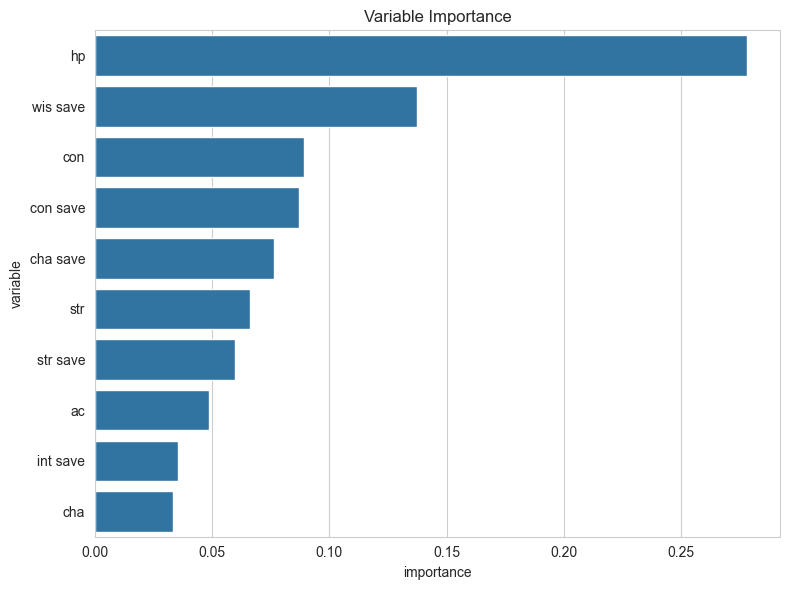

In [142]:

print(X_train.columns)
rankings = best_model.feature_importances_.tolist()
importance = pd.DataFrame(sorted(zip(X_train.columns,rankings),reverse=True),columns=["variable","importance"]).sort_values("importance",ascending = False)

plt.figure(figsize=(8,6))
sns.barplot(x="importance",
            y="variable",
            data=importance[:10])
plt.title('Variable Importance')
plt.tight_layout()